# Ball and Stick Neuron Model Optimisation

- Create a cell model in **BluePyOpt**
- Create a cell **evaluator**
- Run a parameter optimisation

In [1]:
import os
os.unsetenv('PYTHONHOME') # Solve an issue with NEURON simulator import
!pip install -q bluepyopt==1.5.12 matplotlib==2.0.2 numpy==1.13.0 2>&1 | grep -v 'SNIMissingWarning\|InsecurePlatformWarning'

%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload

You should consider upgrading via the 'pip install --upgrade pip' command.


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
#biophysically detailed electrical cell models

import bluepyopt as bpop
import bluepyopt.ephys as ephys

### Cell 

- [Morphology](http://www.neuronland.org/NLMorphologyConverter/MorphologyFormats/SWC/Spec.html)
- Equations of the ion channels on the membrane
- Parameters of the model

In [3]:
morph_swc_string = """
1 1 0.0 0.0 -10.0 10.0 -1                                                        
2 1 0.0 0.0 0.0 10.0 1                                                           
3 1 0.0 0.0 10.0 10.0 2                                                          
4 3 0.0 10.0 0.0 2.0 2                                                           
5 3 0.0 110.0 0.0 2.0 4
"""
with open('ballandstick.swc', 'w') as swc_file:
    swc_file.write(morph_swc_string)

In order to plot the above morphology we use the **Neuronal Morphology Analysis Tool** [NeuroM](https://github.com/BlueBrain/NeuroM)

In [ ]:
import neurom
import neurom.viewer
fig, ax = neurom.viewer.draw(neurom.load_neuron('ballandstick.swc'))

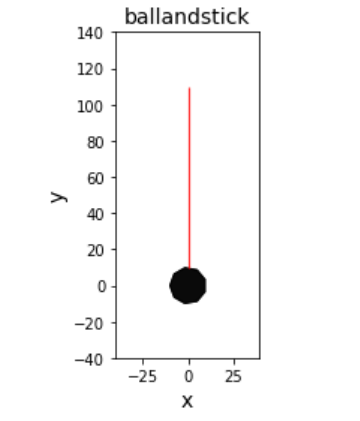

In [ ]:
#NrnFileMorphology object in order to use this morphology in BluPyOpt

morph = ephys.morphologies.NrnFileMorphology('ballandstick.swc')

In [ ]:
somatic_loc = ephys.locations.NrnSeclistLocation('somatic', seclist_name='somatic')
dend_loc = ephys.locations.NrnSeclistLocation('basal', seclist_name='basal')

Specify the ion channels available on the membrane of the above morphology
Hodgkin-Huxley 